In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
#from sklearn import cross_validation
#import re
import operator
#from sklearn.feature_selection import SelectKBest, f_classif
#pd.options.display.max_rows = 10
basesalaire=pd.read_csv('ds_salaries.csv',delimiter=',') # lire le fichier csv contenu dans le fichier de reception
basesalaire

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [8]:
#Reindexé
basesalaire.set_index('Unnamed: 0',inplace=True,drop=True)
basesalaire

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L


In [9]:
#pd.options.display.max_rows = 607
#énumération des colonnes
print(basesalaire.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [10]:
basesalaire.count()

work_year             607
experience_level      607
employment_type       607
job_title             607
salary                607
salary_currency       607
salary_in_usd         607
employee_residence    607
remote_ratio          607
company_location      607
company_size          607
dtype: int64

In [11]:
basesalaire.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [12]:
basesalaire.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [13]:
#la fonction describe permet de faire une brève statistique des vraibles quantitatives de la base
basesalaire.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [14]:
basesalaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
work_year             607 non-null int64
experience_level      607 non-null object
employment_type       607 non-null object
job_title             607 non-null object
salary                607 non-null int64
salary_currency       607 non-null object
salary_in_usd         607 non-null int64
employee_residence    607 non-null object
remote_ratio          607 non-null int64
company_location      607 non-null object
company_size          607 non-null object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


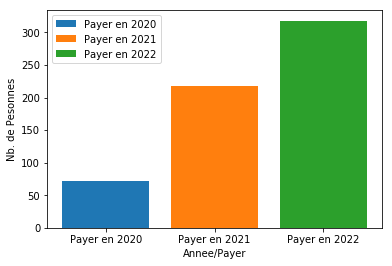

In [20]:
import matplotlib.pyplot as plt
x=basesalaire["work_year"].value_counts()
y=["Payer en 2020","Payer en 2021","Payer en 2022"]
plt.bar (y[0],x[2020],label = "Payer en 2020",align = "center" )
plt.bar (y[1],x[2021],label = "Payer en 2021",align = "center")
plt.bar (y[2],x[2022],label = "Payer en 2022",align = "center")
plt.legend()
plt.ylabel ("Nb. de Pesonnes payer")
plt.xlabel ("Annee/Payer")
plt.show()

In [21]:
x=basesalaire["work_year"].value_counts() # value.counts permet de compter le nombre de personne par catégorie contenu dans une variable

In [22]:
x

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [23]:
Payer2020 = basesalaire[basesalaire.work_year ==2020]
Payer2021 = basesalaire[basesalaire.work_year ==2021]
Payer2022 = basesalaire[basesalaire.work_year ==2022]

In [24]:
Payer2020

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L


In [25]:
from numpy import array
import matplotlib.pyplot as plt
def plot_hist(feature, bins = 20):
    x1 = array(Payer2020[feature].dropna())
    x2 = array(Payer2021[feature].dropna())
    x3 = array(Payer2022[feature].dropna())
    plt.hist([x1, x2, x3], label=['Payer en 2020', 'Payer en 2021', 'Payer en 2022'], bins = bins)#, color = ['b', 'r', 'g']
    plt.legend(loc = 'upper left')
    plt.ylabel ("Nb. de Pesonnes Payer")
    plt.title('Distribution relative de %s' %feature)
    plt.show()

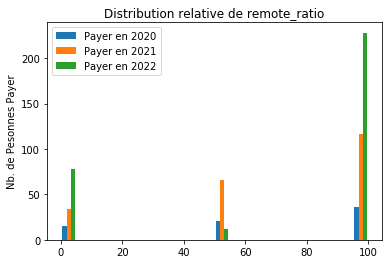

In [27]:
plot_hist('remote_ratio')

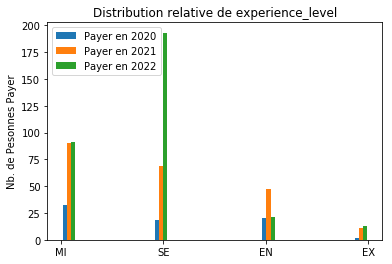

In [28]:
plot_hist('experience_level')

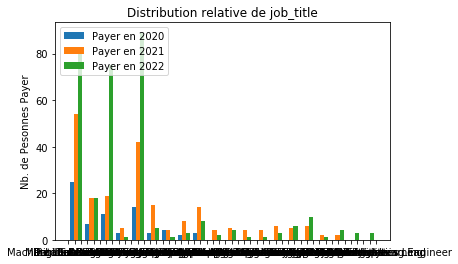

In [29]:
plot_hist('job_title')

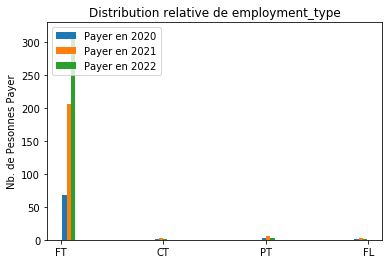

In [31]:
plot_hist('employment_type')